# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Observation1: In the figure of City Latitude vs max temperature figure, when the latitude goes higher, the max temperaure will be lower. 
# Observation2: In north hemisphere, the max tempature is generally lower than south hemisphere.
# Observation3: Cloudiness and windspeed is not related to latitude. 


# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

584

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "Hithadhoo"
units = "imperial"
query_url = url + "appid=" + weather_api_key +"&q=" + city +"&units=" + units
weather_json = requests.get(query_url).json()
city = weather_json["name"]
lat = weather_json["coord"]["lat"]
lon = weather_json["coord"]["lon"]
max_temp = weather_json["main"]["temp_max"]
humidity = weather_json["main"]["humidity"]
cloudiness = weather_json["clouds"]["all"]
windspeed = weather_json["wind"]["speed"]
country = weather_json["sys"]["country"]
date = weather_json["dt"]
print(date)

pprint(weather_json) 
print(weather_json["name"])

1669052042
{'base': 'stations',
 'clouds': {'all': 64},
 'cod': 200,
 'coord': {'lat': -0.6, 'lon': 73.0833},
 'dt': 1669052042,
 'id': 1282256,
 'main': {'feels_like': 85.42,
          'grnd_level': 1011,
          'humidity': 78,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 80.71,
          'temp_max': 80.71,
          'temp_min': 80.71},
 'name': 'Hithadhoo',
 'sys': {'country': 'MV', 'sunrise': 1668991753, 'sunset': 1669035481},
 'timezone': 18000,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 268, 'gust': 11.79, 'speed': 10.56}}
Hithadhoo


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
name = []
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
windspeed = []
country = []
date = []


url = "http://api.openweathermap.org/data/2.5/weather?"
for city in cities:
    try:
        query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
        weather_json = requests.get(query_url).json()
        city_name = weather_json["name"]
        print(f"Processing Record: {city_name}")
        name.append(weather_json["name"])
        lat.append(weather_json["coord"]["lat"])
        lon.append(weather_json["coord"]["lon"])
        max_temp.append(weather_json["main"]["temp_max"])
        humidity.append(weather_json["main"]["humidity"])
        cloudiness.append(weather_json["clouds"]["all"])
        windspeed.append(weather_json["wind"]["speed"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        
    except KeyError: 
        print("City not found. Skipping...")

Processing Record: Busselton
Processing Record: Albany
City not found. Skipping...
Processing Record: Salto
Processing Record: Kapaa
Processing Record: Faanui
Processing Record: Mataura
Processing Record: Rikitea
Processing Record: Port Lincoln
Processing Record: Lokosovo
Processing Record: Dauriya
Processing Record: Port Hedland
Processing Record: Kattivākkam
Processing Record: Atuona
Processing Record: Sungai Raya
Processing Record: Tual
Processing Record: Vaini
Processing Record: Coquimbo
Processing Record: Gavrilov Posad
City not found. Skipping...
City not found. Skipping...
Processing Record: Norman Wells
City not found. Skipping...
Processing Record: Hobart
Processing Record: Hūn
Processing Record: Josanicka Banja
Processing Record: Kavaratti
Processing Record: Saint George
Processing Record: Hongjiang
Processing Record: Iqaluit
Processing Record: Tasiilaq
Processing Record: New Norfolk
Processing Record: Nome
Processing Record: Lüderitz
Processing Record: Naryan-Mar
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
weather_df = pd.DataFrame({"City": name, "Lat": lat, "Lng": lon, "Max Temp": max_temp, "Humidity": humidity, "Cloudiness": cloudiness,
                            "Wind Speed": windspeed, "Country": country, "Date": date})

weather_df.to_csv("output_weather_df.csv")

In [15]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,5.340000e+02
mean,22.099380,17.699939,52.745599,72.694757,64.874532,8.182978,1.669052e+09
std,33.187631,90.517220,29.368798,21.792353,36.928271,6.030087,1.304948e+02
min,-54.800000,-175.200000,-37.260000,9.000000,0.000000,0.000000,1.669052e+09
25%,-4.829400,-61.954325,32.920000,58.000000,40.000000,3.490000,1.669052e+09
50%,26.372450,25.446000,61.365000,78.000000,75.000000,6.820000,1.669052e+09
75%,50.179725,93.347700,76.710000,89.750000,99.000000,11.277500,1.669052e+09
max,78.218600,178.416700,95.320000,100.000000,100.000000,50.530000,1.669053e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
remove_hum_100 = weather_df.loc[weather_df["Humidity"] != 100]
remove_hum_100.describe()
len(remove_hum_100)

514

In [17]:
#  Get the indices of cities that have humidity over 100%.
hum_over_100 = weather_df.loc[weather_df["Humidity"] > 100]
hum_over_100.index

Int64Index([], dtype='int64')

In [18]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
hum_df = remove_hum_100["Humidity"]
quartiles = hum_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

clean_city_data = remove_hum_100.loc[(remove_hum_100["Humidity"] < upper_bound) & (remove_hum_100["Humidity"]>lower_bound)]
len(clean_city_data)










506

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<AxesSubplot:title={'center':'City Latitude vs. Max Temperature'}, xlabel='Latitude', ylabel='Max Temperature (F)'>

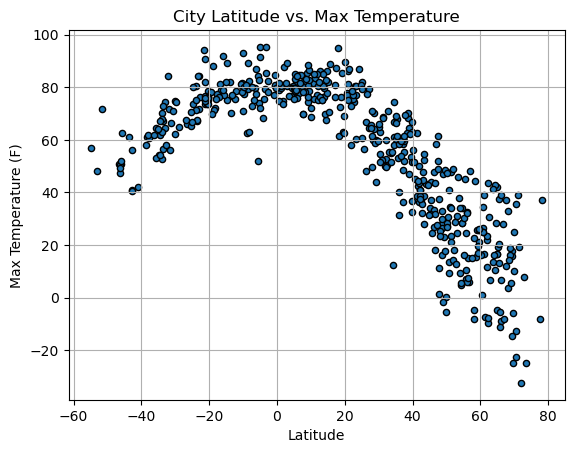

In [19]:
clean_city_data.plot(kind = "scatter", x="Lat", y="Max Temp", grid = True, 
                    title = "City Latitude vs. Max Temperature", xlabel = "Latitude", 
                    ylabel = "Max Temperature (F)",facecolors="blue", edgecolors="black")


## Latitude vs. Humidity Plot

<AxesSubplot:title={'center':'City Latitude vs. Humidity'}, xlabel='Latitude', ylabel='Humidity(%)'>

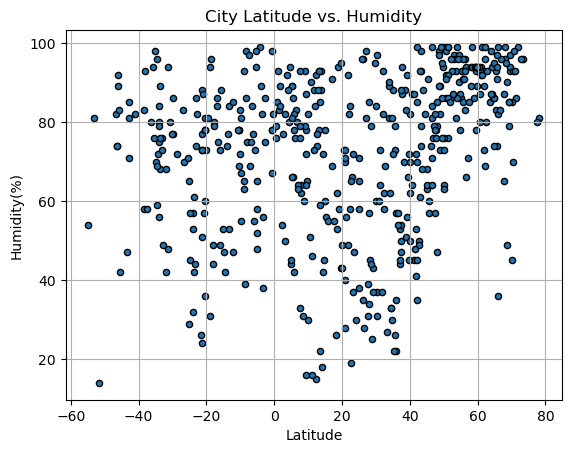

In [20]:
clean_city_data.plot(kind = "scatter", x="Lat", y="Humidity", grid = True, 
                    title = "City Latitude vs. Humidity", xlabel = "Latitude", 
                    ylabel = "Humidity(%)",facecolors="blue", edgecolors="black")

## Latitude vs. Cloudiness Plot

<AxesSubplot:title={'center':'City Latitude vs. Cloudiness'}, xlabel='Latitude', ylabel='Cloudiness'>

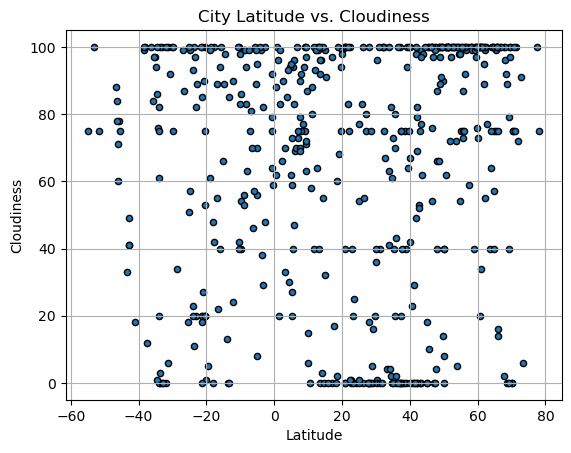

In [21]:
clean_city_data.plot(kind = "scatter", x="Lat", y="Cloudiness", grid = True, 
                    title = "City Latitude vs. Cloudiness", xlabel = "Latitude", 
                    ylabel = "Cloudiness",facecolors="blue", edgecolors="black")

## Latitude vs. Wind Speed Plot

<AxesSubplot:title={'center':'City Latitude vs. Wind Speed'}, xlabel='Latitude', ylabel='Wind Speed (mph)'>

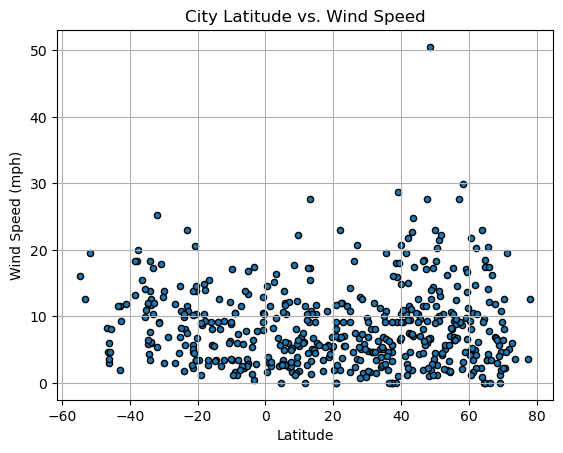

In [22]:
clean_city_data.plot(kind = "scatter", x="Lat", y="Wind Speed", grid = True, 
                    title = "City Latitude vs. Wind Speed", xlabel = "Latitude", 
                    ylabel = "Wind Speed (mph)",facecolors="blue", edgecolors="black")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8830578065017525


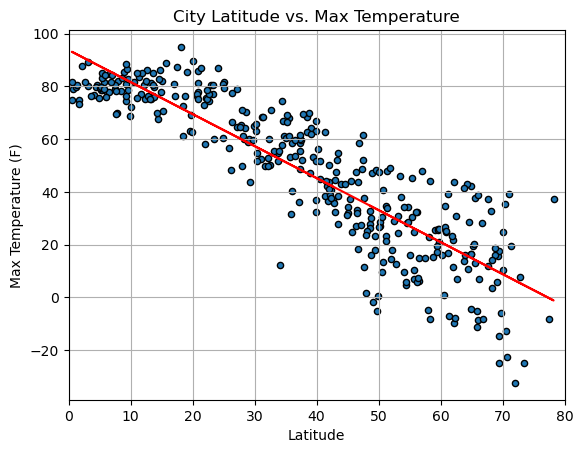

In [23]:
northern_city_data = clean_city_data.loc[clean_city_data["Lat"]>0]
x_value = northern_city_data["Lat"]
y_value = northern_city_data["Max Temp"]
northern_city_data.plot(kind = "scatter", x="Lat", y="Max Temp", grid = True, 
                    title = "City Latitude vs. Max Temperature", xlabel = "Latitude", 
                    ylabel = "Max Temperature (F)",facecolors="blue", edgecolors="black", xlim = (0, 80))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(5.8,250),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7323939050081991


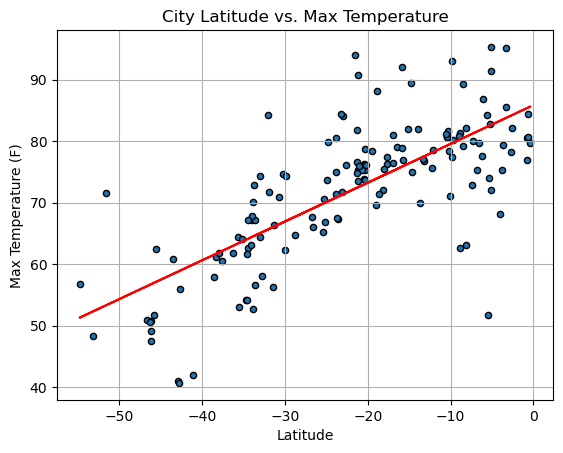

In [24]:
southern_city_data = clean_city_data.loc[clean_city_data["Lat"]<0]
x_value = southern_city_data["Lat"]
y_value = southern_city_data["Max Temp"]
southern_city_data.plot(kind = "scatter", x="Lat", y="Max Temp", grid = True, 
                    title = "City Latitude vs. Max Temperature", xlabel = "Latitude", 
                    ylabel = "Max Temperature (F)",facecolors="blue", edgecolors="black")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(-55, 301),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3796180787488858


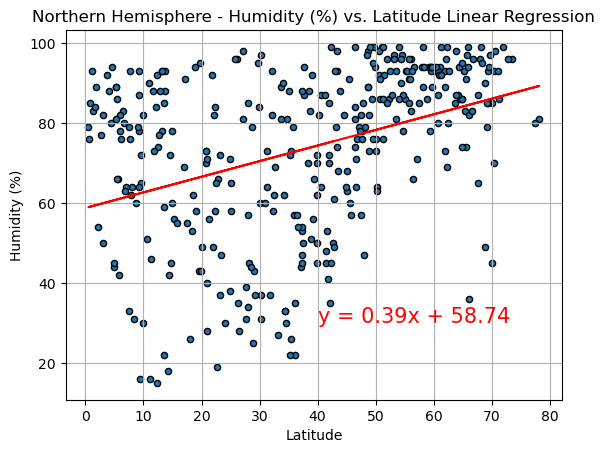

In [25]:
northern_city_data = clean_city_data.loc[clean_city_data["Lat"]>0]
x_value = northern_city_data["Lat"]
y_value = northern_city_data["Humidity"]
northern_city_data.plot(kind = "scatter", x="Lat", y="Humidity", grid = True, 
                    title = "Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression", xlabel = "Latitude", 
                    ylabel = "Humidity (%)",facecolors="blue", edgecolors="black")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.04638182824633513


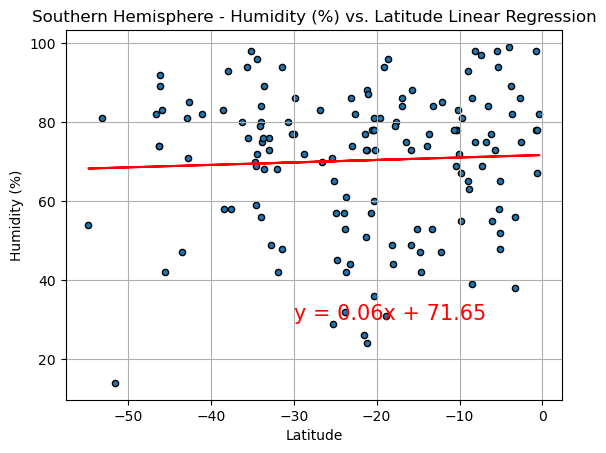

In [26]:
southern_city_data = clean_city_data.loc[clean_city_data["Lat"]<0]
x_value = southern_city_data["Lat"]
y_value = southern_city_data["Humidity"]
southern_city_data.plot(kind = "scatter", x="Lat", y="Humidity", grid = True, 
                    title = "Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression", xlabel = "Latitude", 
                    ylabel = "Humidity (%)",facecolors="blue", edgecolors="black")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(-30, 30),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.14507908348608328


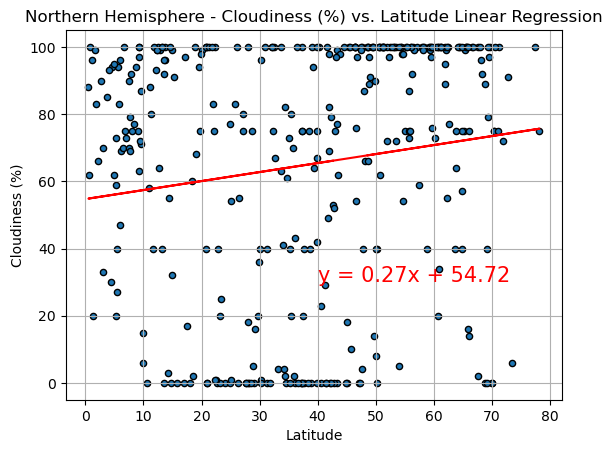

In [27]:
northern_city_data = clean_city_data.loc[clean_city_data["Lat"]>0]
x_value = northern_city_data["Lat"]
y_value = northern_city_data["Cloudiness"]
northern_city_data.plot(kind = "scatter", x="Lat", y="Cloudiness", grid = True, 
                    title = "Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression", xlabel = "Latitude", 
                    ylabel = "Cloudiness (%)",facecolors="blue", edgecolors="black")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0429305169640784


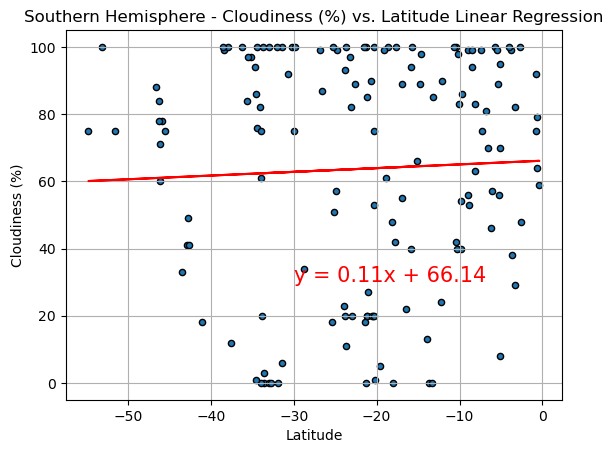

In [28]:
southern_city_data = clean_city_data.loc[clean_city_data["Lat"]<0]
x_value = southern_city_data["Lat"]
y_value = southern_city_data["Cloudiness"]
southern_city_data.plot(kind = "scatter", x="Lat", y="Cloudiness", grid = True, 
                    title = "Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression", xlabel = "Latitude", 
                    ylabel = "Cloudiness (%)",facecolors="blue", edgecolors="black")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(-30, 30),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.1064915302120238


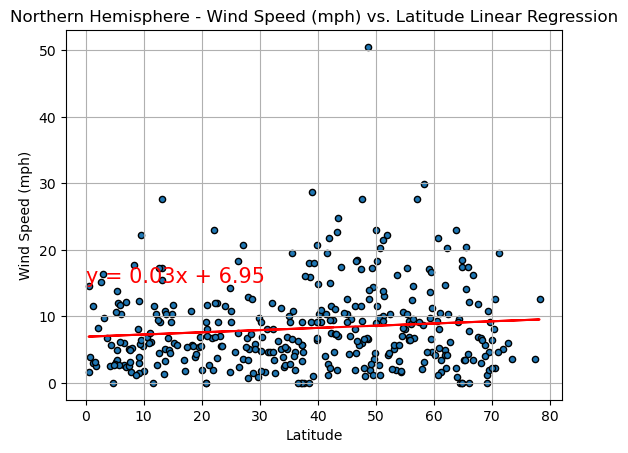

In [29]:
northern_city_data = clean_city_data.loc[clean_city_data["Lat"]>0]
x_value = northern_city_data["Lat"]
y_value = northern_city_data["Wind Speed"]
northern_city_data.plot(kind = "scatter", x="Lat", y="Wind Speed", grid = True, 
                    title = "Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression", xlabel = "Latitude", 
                    ylabel = "Wind Speed (mph)",facecolors="blue", edgecolors="black")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(0,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.26499500448540714


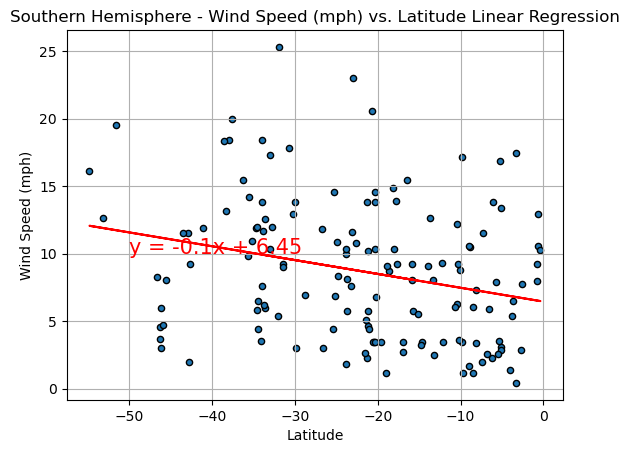

In [30]:
southern_city_data = clean_city_data.loc[clean_city_data["Lat"]<0]
x_value = southern_city_data["Lat"]
y_value = southern_city_data["Wind Speed"]
southern_city_data.plot(kind = "scatter", x="Lat", y="Wind Speed", grid = True, 
                    title = "Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression", xlabel = "Latitude", 
                    ylabel = "Wind Speed (mph)",facecolors="blue", edgecolors="black")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(-50, 10),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")